## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.eda import EDA

In [3]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
df = pd.read_csv("../data/AdSmartABdata.csv", na_values=missing_values)
eda = EDA(df)

## General statistics 

In [4]:
eda.descriptive_stats(size=True)

(8077, 9)

In [5]:
# data types of columns
eda.descriptive_stats(info=True)

<bound method DataFrame.info of                                 auction_id experiment        date  hour  \
0     0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1     000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2     0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3     00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4     001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   
...                                    ...        ...         ...   ...   
8072  ffea24ec-cec1-43fb-b1d1-8f93828c2be2    exposed  2020-07-05     7   
8073  ffea3210-2c3e-426f-a77d-0aa72e73b20f    control  2020-07-03    15   
8074  ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7    control  2020-07-04     9   
8075  ffeeed62-3f7c-4a6e-8ba7-95d303d40969    exposed  2020-07-05    15   
8076  fffbb9ff-568a-41a5-a0c3-6866592f80d8    control  2020-07-10    14   

             device_make  platform_os                browser  yes  

In [6]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns
eda.descriptive_stats(describe=True)

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


In [7]:
# checking for missing values
eda.has_missing_values()

False

In [10]:
# unique value counts
unique_counts = df['auction_id'].nunique()
unique_counts

8077

In [11]:
# unique value counts of experiment
counts_df = df['experiment'].value_counts()
counts_df

control    4071
exposed    4006
Name: experiment, dtype: int64

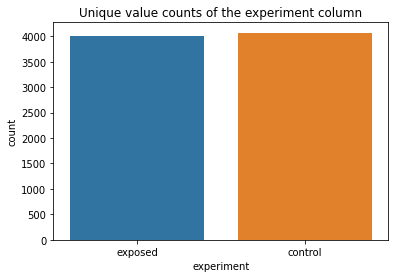

In [9]:
experiment_plot = eda.plot_counts("experiment",type="univariate")

In [13]:
# unique value counts
counts_df = df['date'].value_counts()
counts_df

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

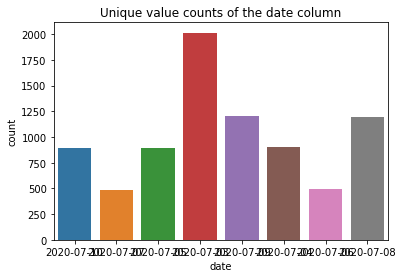

In [11]:
date_plot = eda.plot_counts("date",type="univariate")

In [15]:
# unique value counts of devices
counts_df = df['device_make'].value_counts()
counts_df

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [16]:
df['device_make'].nunique()

270

In [17]:
# unique value counts of the platforms used
counts_df = df['platform_os'].value_counts()
counts_df

6    7648
5     428
7       1
Name: platform_os, dtype: int64

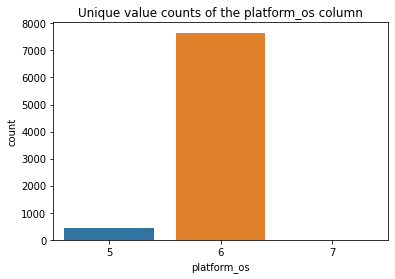

In [12]:
platform_plot = eda.plot_counts("platform_os",type="univariate")

In [19]:
# unique value counts of the browser
counts_df = df['browser'].value_counts()
counts_df

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

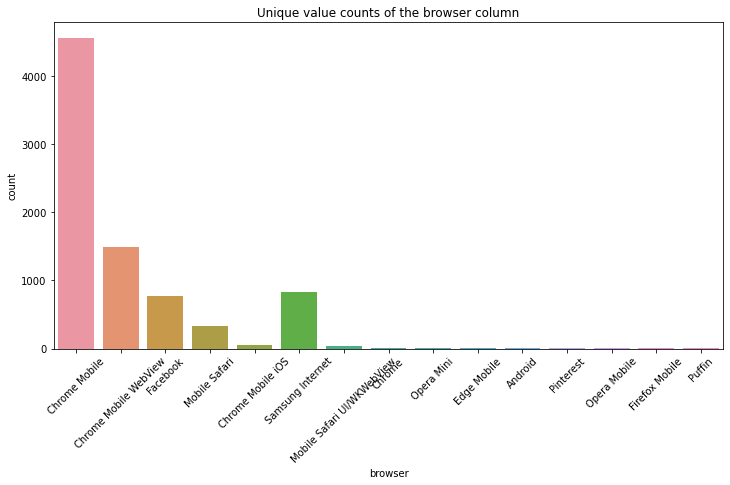

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="browser")
plt.title('Unique value counts of the browser column')
plt.xticks(rotation=45)
plt.show()

In [21]:
# unique value counts of people who are aware of the company
counts_df = df['yes'].value_counts()
counts_df

0    7505
1     572
Name: yes, dtype: int64

sns.countplot(data=df, x="yes")
plt.title('Unique value counts of the yes column')
plt.show()

In [23]:
# unique value counts of the people who are not aware of the company
counts_df = df['no'].value_counts()
counts_df

0    7406
1     671
Name: no, dtype: int64

## Bivariate Analysis

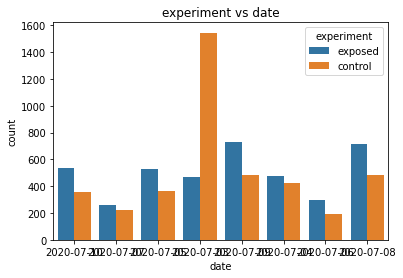

In [14]:
# Experiment with Date
experiment_date = eda.plot_counts("experiment","date","bivariate")

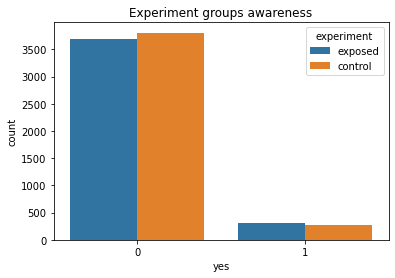

In [27]:
sns.countplot(data=df, x="yes", hue="experiment")
plt.title('Experiment groups awareness')
plt.show()
experiment_yes=eda.

## Correlation Analysis

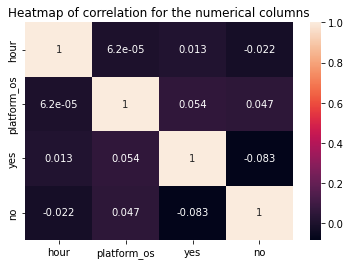

In [28]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation for the numerical columns')
plt.show()